In [2]:
"""Preprocess data that consist of .obj to .binvox"""

from utils import Preprocessor

preprocessor = Preprocessor(
    use_to_mirror=False,
    use_to_rotate=False,
    use_to_overwrite=True,
    use_to_plot =False,
    plot_voxels=True,
    binvox_resolution=32,
    rotation_interval=7.2,
    rotation_max=360,
)

preprocessor.preprocess()

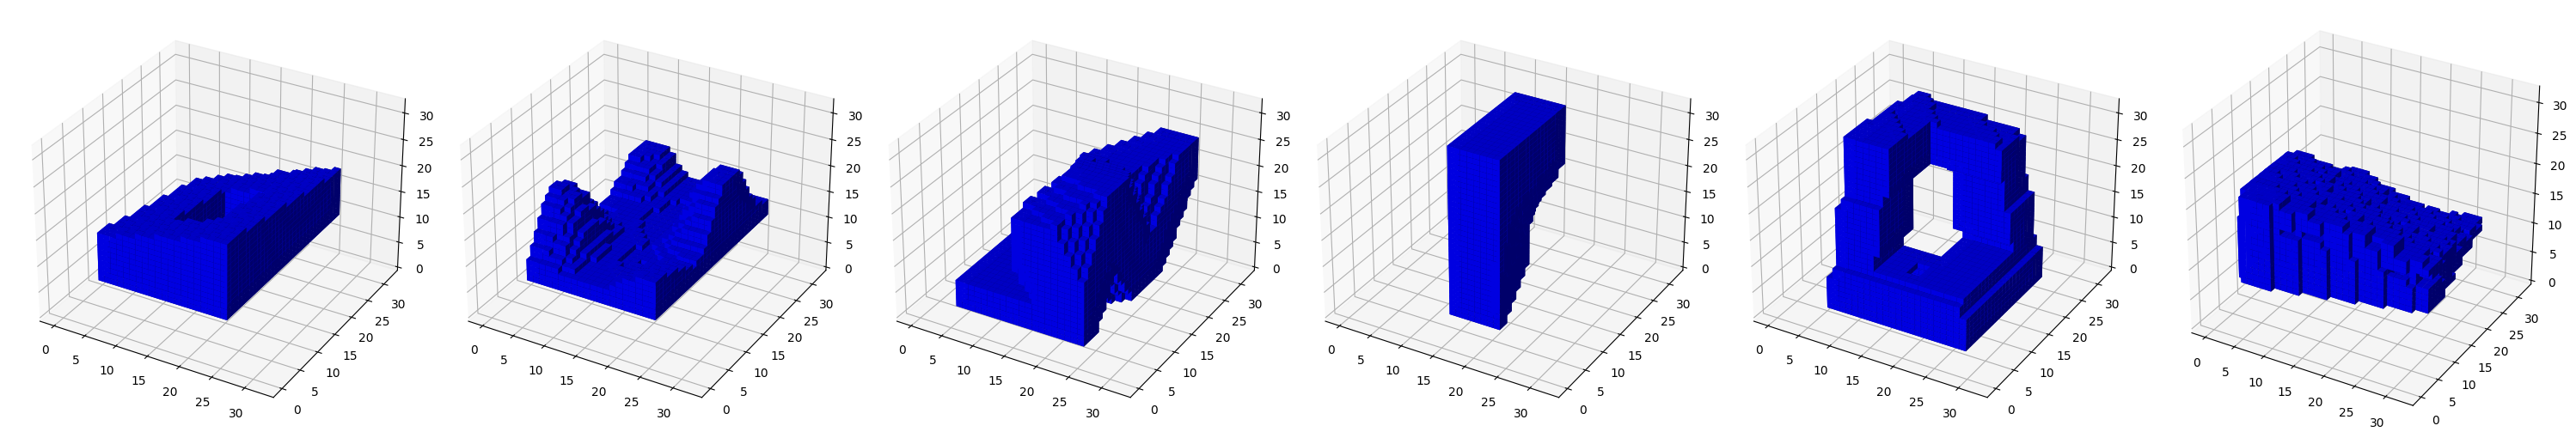

In [3]:
from utils import Utils

import binvox_rw

data_paths_to_plot = [
    r"data\preprocessed\79ANDPARK\79ANDPARK.binvox",
    r"data\preprocessed\LEGOTOWERS\LEGOTOWERS.binvox",
    r"data\preprocessed\RED7\RED7.binvox",
    r"data\preprocessed\VANCOUVERHOUSE\VANCOUVERHOUSE.binvox",
    r"data\preprocessed\CCTVHEADQUARTER\CCTVHEADQUARTER.binvox",
    r"data\preprocessed\MOUNTAINDWELLING\MOUNTAINDWELLING.binvox",
]

data_list = []
for data_path_to_plot in data_paths_to_plot:
    with open(data_path_to_plot, 'rb') as f:
        model = binvox_rw.read_as_3d_array(f)
        data_list.append(model.data)

Utils.plot_binvox(data_list=data_list, plot_voxels=True, figsize=(50, 50))

In [1]:
import torch
from torch.utils.data import DataLoader

from model import BinvoxDataset, Generator, Discriminator, MassganTrainer
from config import Config

"""Define dataloader for training"""
dataset = BinvoxDataset(data_path=Config.DATA_PREPROCESSED_DIR_MERGED)
dataloader = DataLoader(
    dataset, 
    batch_size=Config.BATCH_SIZE, 
    shuffle=True,
)

"""Define trainer for the massGAN training"""
trainer = MassganTrainer(
    generator=Generator(z_dim=Config.Z_DIM),
    discriminator=Discriminator(),
    dataloader=dataloader,
    epochs=Config.EPOCHS,
    loss_function=torch.nn.BCELoss(),
    learning_rate=Config.LEARNING_RATE,
    seed=Config.SEED,
    initial_weights_key=Config.XAVIER,
    pths_dir=Config.PTHS_DIR,
)

Seeds status:
  Seeds set for torch        : 777
  Seeds set for torch on GPU : 777
  Seeds set for numpy        : 777
  Seeds set for random       : 777

Set initial weights from existing .pths:
  generator_pth_path:     pths\2023-10-25 14-49-58.852206\generator_epoch_20000.pth
  discriminator_pth_path: pths\2023-10-25 14-49-58.852206\discriminator_epoch_20000.pth


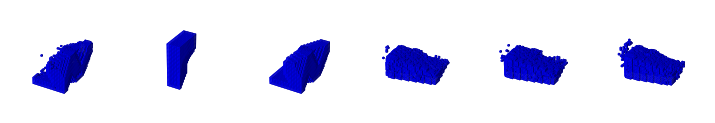

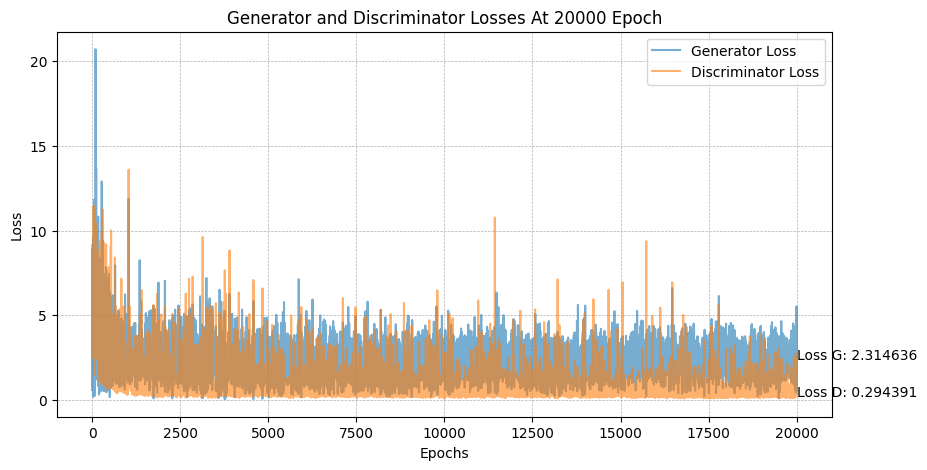

In [4]:
"""Training models!!!"""

trainer.train()

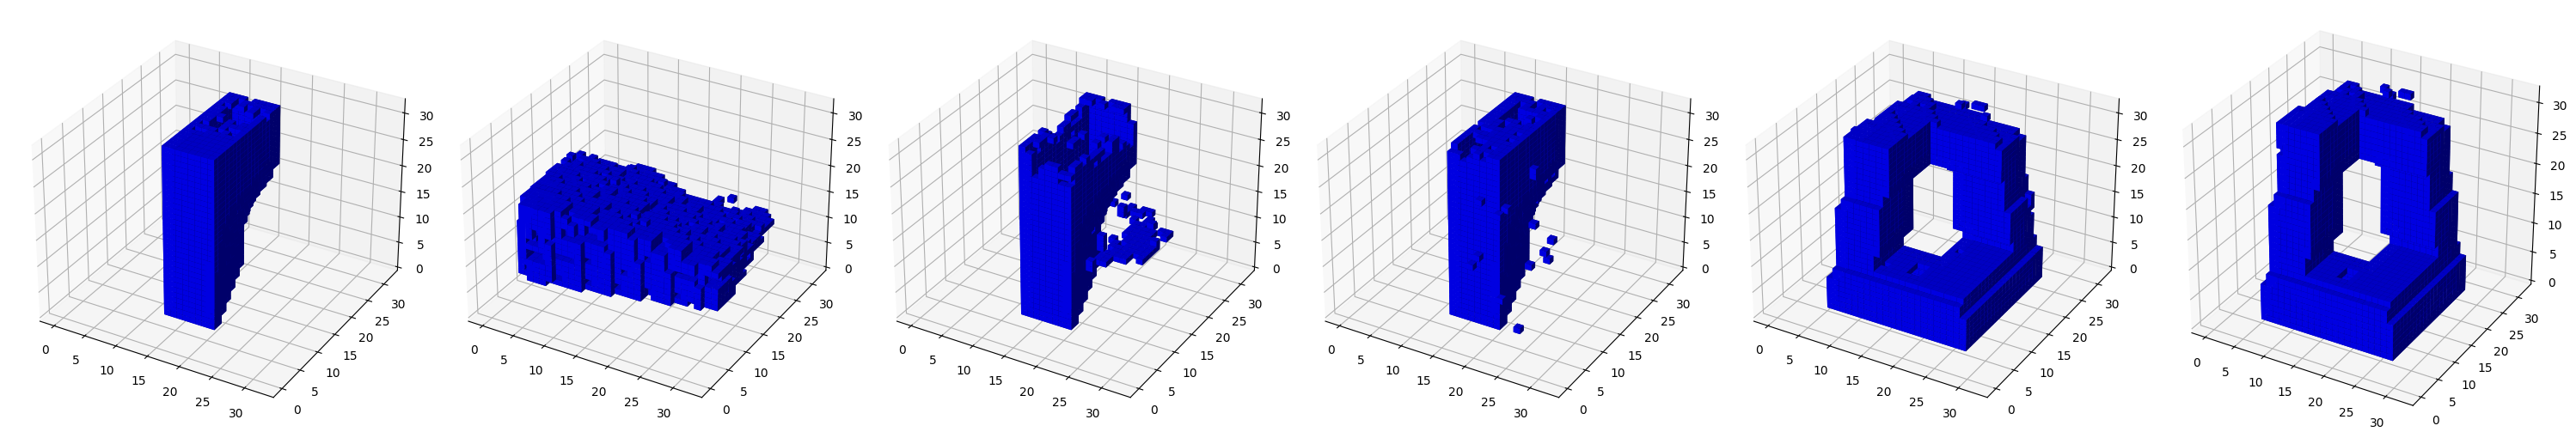

In [2]:
trainer.evaluate(
    evaluate_batch_size=6, 
    epoch=0, 
    save_fig=False,
    plot_voxels=True, 
    figsize=(50, 50)
)

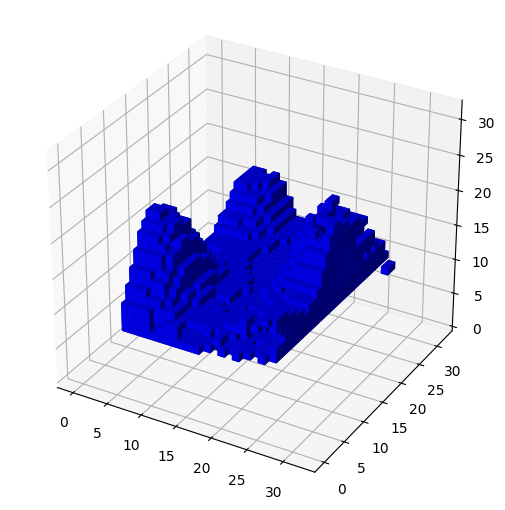

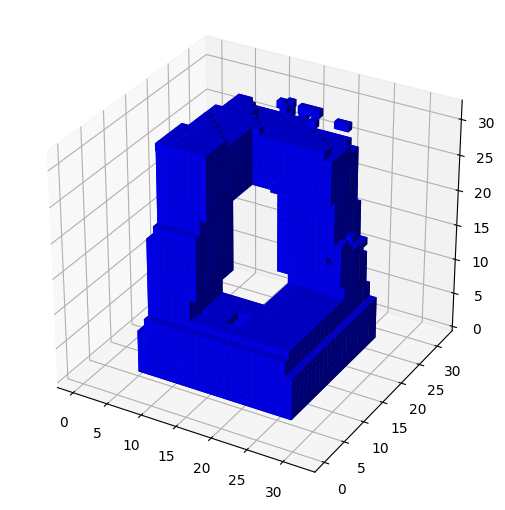

In [12]:
from utils import Utils
from IPython.display import clear_output

trainer.set_seed(11111)
clear_output()

trainer.generator.eval()
with torch.no_grad():
    
    noise_1 = torch.randn(1, Config.Z_DIM, 1, 1, 1).to(Config.DEVICE)
    noise_1_binvox = trainer.generator(noise_1).squeeze().cpu().detach().numpy() > 0.5
    Utils.plot_binvox([noise_1_binvox], figsize=(50, 50), plot_voxels=True)

    noise_2 = torch.randn(1, Config.Z_DIM, 1, 1, 1).to(Config.DEVICE)
    noise_2_binvox = trainer.generator(noise_2).squeeze().cpu().detach().numpy() > 0.5
    Utils.plot_binvox([noise_2_binvox], figsize=(50, 50), plot_voxels=True)

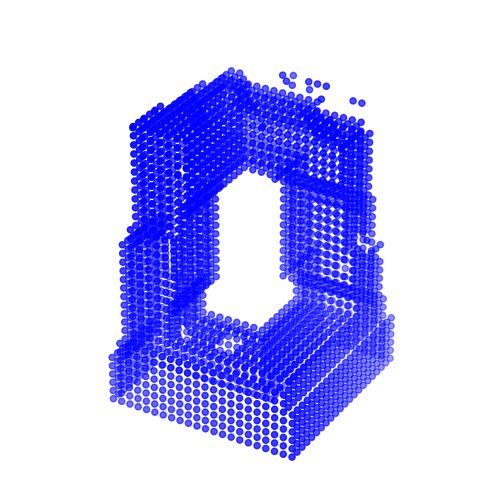

In [15]:
from utils import Utils

Utils.plot_interpolated_masses(
    generator=trainer.generator,
    noises=[noise_1, noise_2], 
    num_steps=20, 
    plot_voxels=False, 
    figsize=(50, 50), 
    axis_off=True,
    # save_fig=True,
)